In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot settings
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [3]:
# Functions
def load_data(pressure = 0.5, procent_of_data = 1, length_of_data = 10):
    data = pd.DataFrame({'Tid': [], 'Kanal A': []})
    with open('../Data/{}_bar_extra.csv'.format(pressure), 'r') as file:
        count = 0
        for i in range(5, length_of_data):
            if i % int(1/procent_of_data) == 0:
                try:
                    data.loc[count] = [float(x.replace(',', '.')) for x in file.readline().split(';')]
                    count += 1
                except:
                    pass
            file.readline()
    return data

def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), save = False, label = None, filename = 'default.pdf'):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label)

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Save fig if save == True
    if save:
        plt.savefig(filename)
    
    # Return fig and ax
    return fig, ax

def plot_ax(ax, legend = False, grid = False):
    if grid:
        ax.grid()
    if legend:
        ax.legend()
    plt.show()
    
def cut_data(data, xlimit_file): # Takes in a list of dataframes and cuts them on x-axis according to xlimit_file
    # Load in xlimits in dict form, such that xlimits = {'0.5': [lower xlimit, upper xlimit], ...}
    xlimits = {}
    with open(xlimit_file, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            line = line.split(',')
            if i != 0:
                xlimits[line[0]] = [float(i) for i in line[1].split('-')] 
    
    # Create a dict of new dataframes
    new_data = {}
    for pressure, d in data.items():
        temp_holder_for_data = d[d.Tid > xlimits[pressure][0]]
        new_data[pressure] = temp_holder_for_data[temp_holder_for_data.Tid < xlimits[pressure][1]]
        
    # Return new data
    return new_data

In [4]:
# Find length of data
length = len(pd.read_csv('../Data/0.5_bar_extra.csv', delimiter = ';'))

# Get nescesarry data
pressures = ['0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
data = {}
for pressure in pressures:
    data[pressure] = load_data(pressure = pressure, procent_of_data = 0.0005, length_of_data = length)

In [5]:
# Visualize dataframe
data['0.5'].head()

,Tid,Kanal A
0,0.006645,3.029343
1,0.013321,3.029343
2,0.019996,3.029343
3,0.026671,3.124077
4,0.033347,3.124077


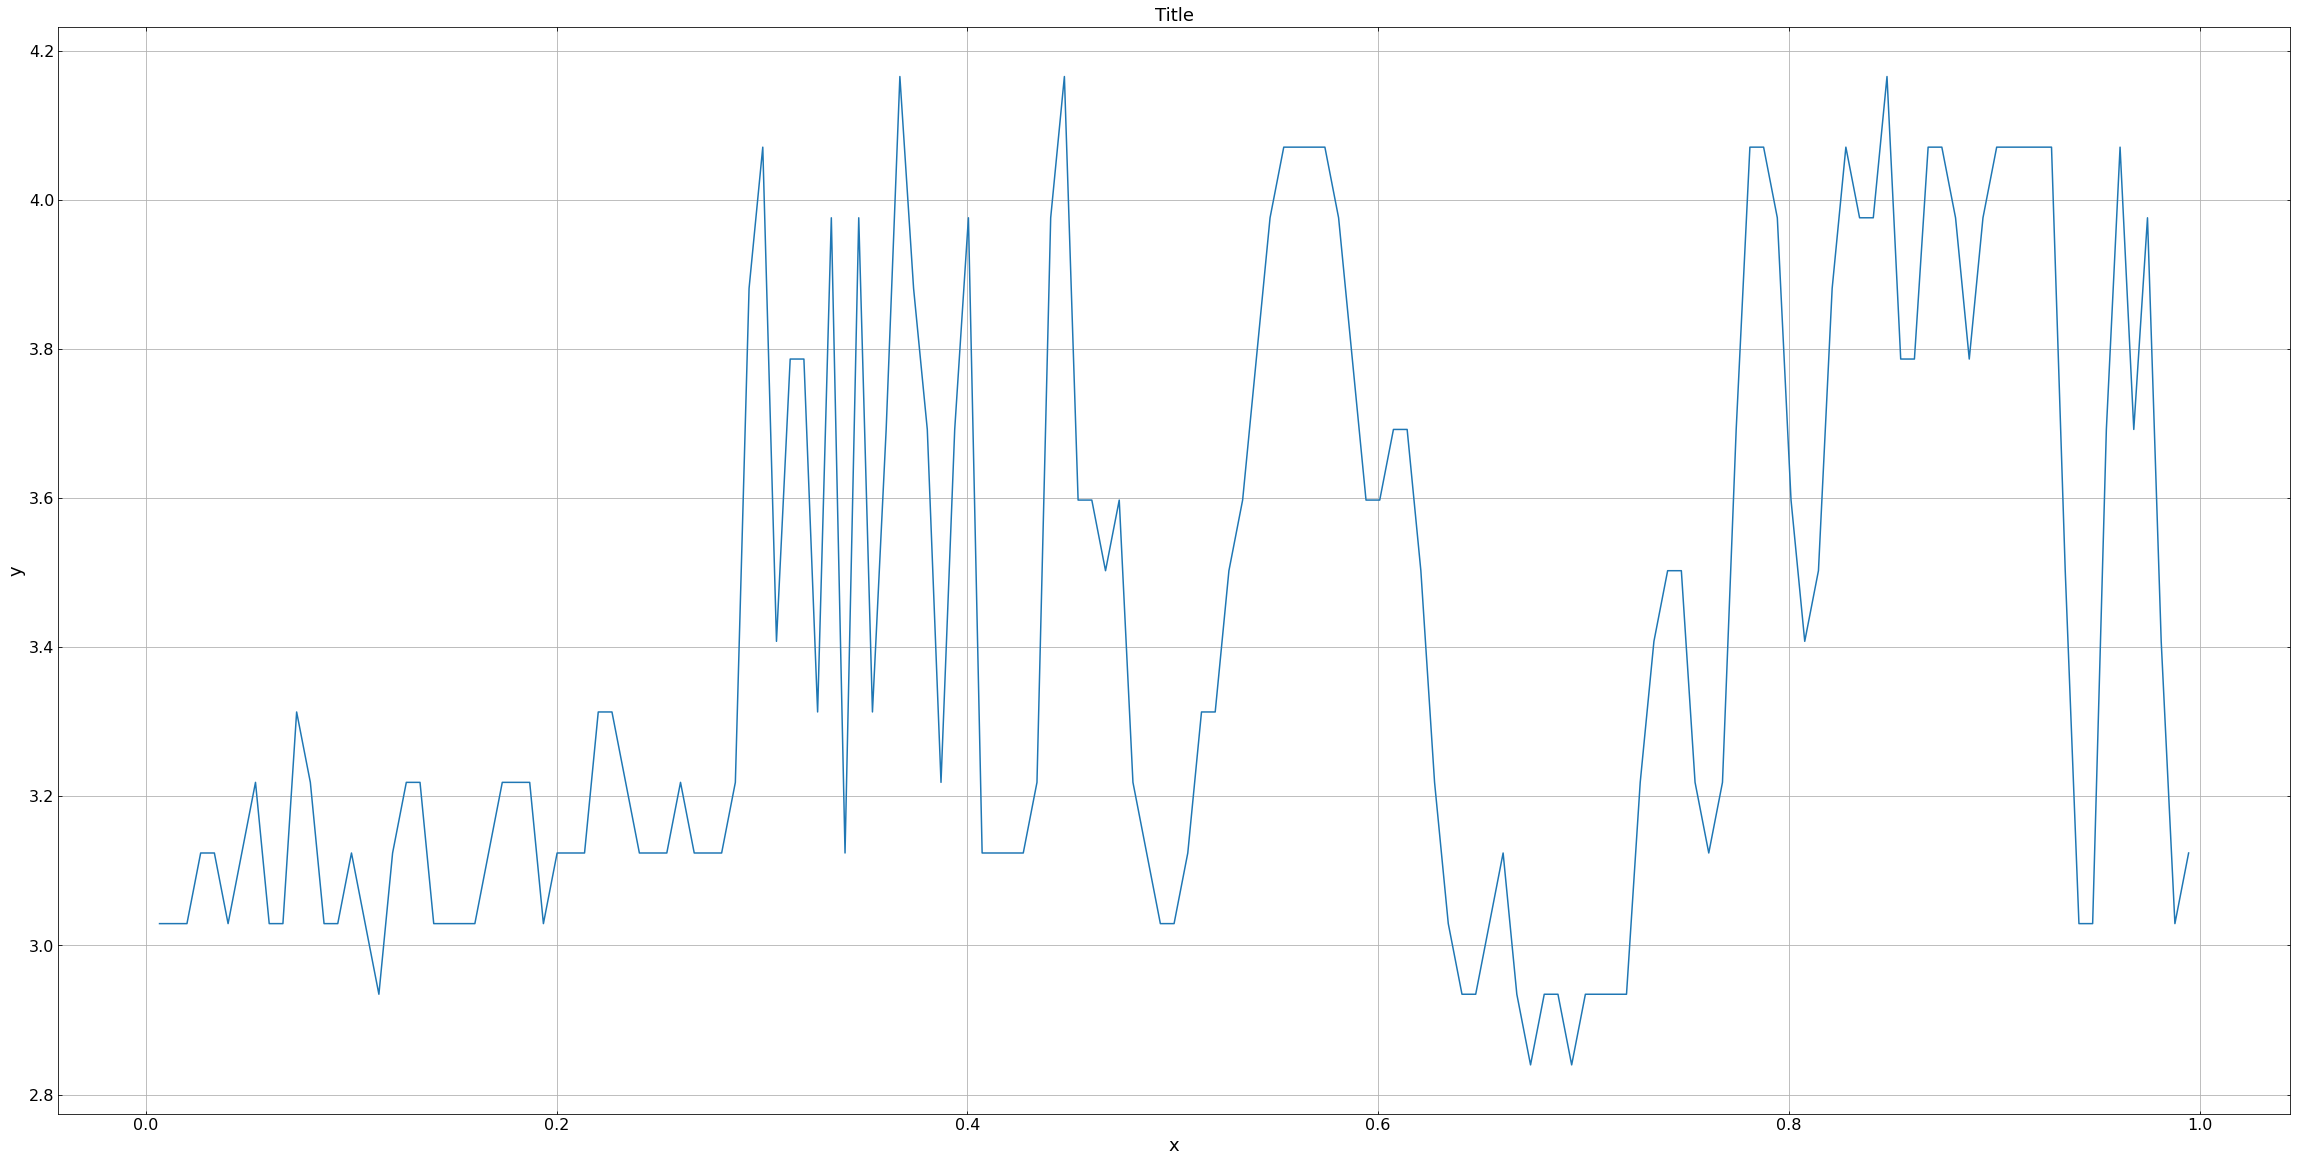

In [6]:
# Make ax and fig
fig, ax = make_ax(data['0.5'], x = 'Tid', y = 'Kanal A', figsize = (40, 20))

# Plot ax
plot_ax(ax, grid = True)

In [7]:
# Cut data on x-axis according to xlimits.txt
new_data = cut_data(data, xlimit_file = 'x_limits.txt')

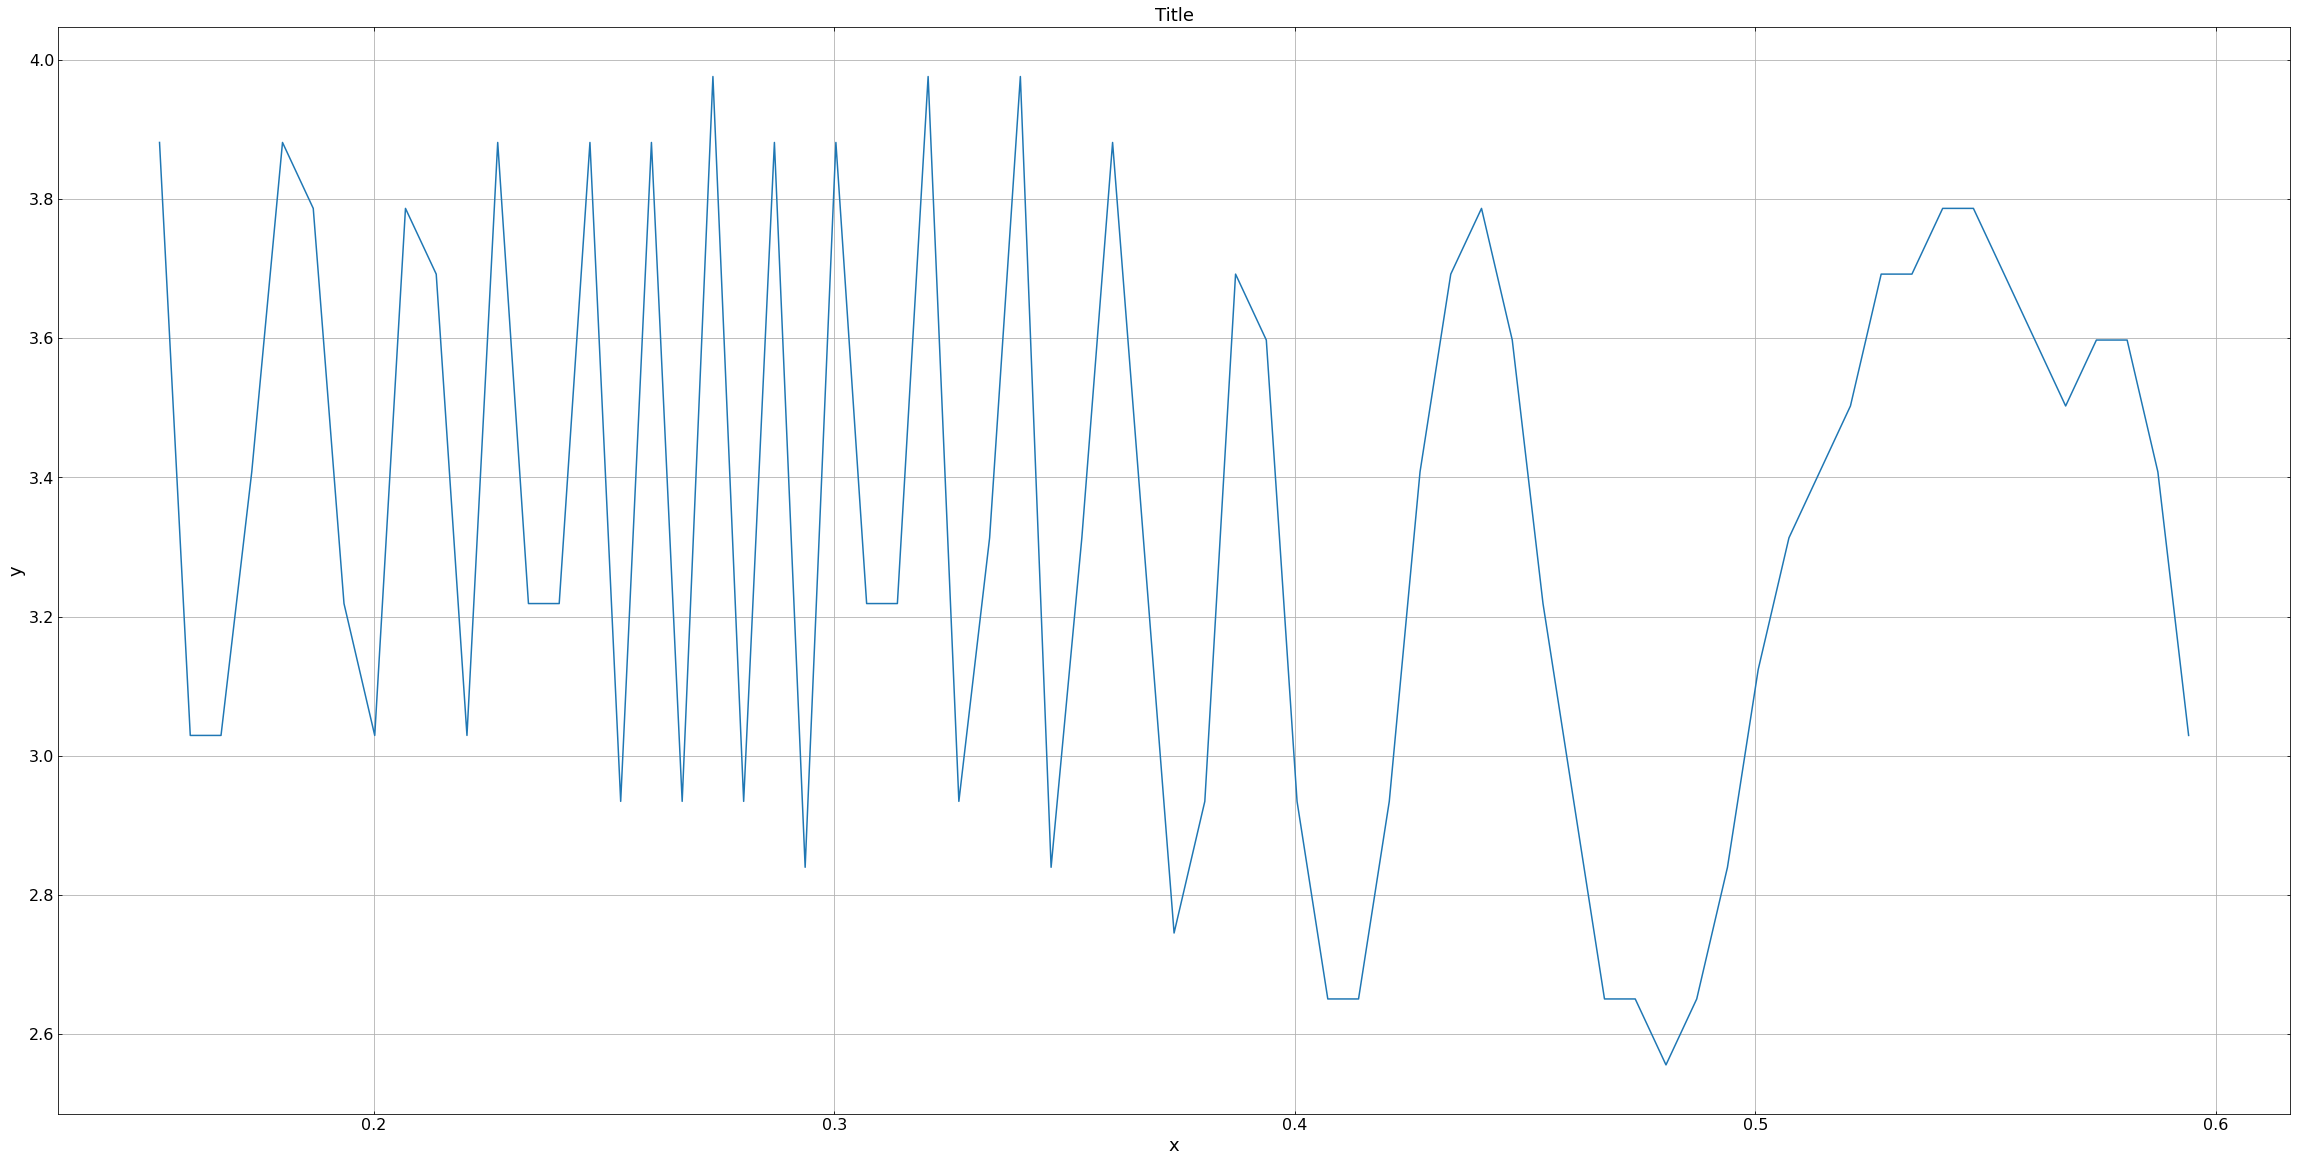

In [8]:
# Make ax and fig
fig, ax = make_ax(new_data['1.0'], x = 'Tid', y = 'Kanal A', figsize = (40, 20))

# Plot ax
plot_ax(ax, grid = True)

In [9]:
# Upload cut data to csv files in Cleaned_Data directory
if False:
    for pressure, d in new_data.items():
        d.to_csv('../Cleaned_Data/cut_data_{}_extra.csv'.format(pressure))